# Neptune

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy import interpolate
from scipy.interpolate import interp1d
import seaborn as sns

### Lambert Scaling Function

In [2]:
# To convert to phase angle= 0 use the lambertian phase integral (PSG eqn 77) to simulate full disk view
def get_scale_factor_lambert(phase_angle): # phase angle in degrees
    scale_val= (1/np.pi)*(np.sin(np.deg2rad(phase_angle))+(np.pi-np.deg2rad(phase_angle))*np.cos(np.deg2rad(phase_angle)))
    return scale_val

### Read in all data sources

In [3]:
# karkoschka 1998 full disk albedo (updated values)\
kark_98= np.genfromtxt('1995_karkoschka.txt')
# Roberge et al. 2017 SpeX Data (beyond 1.05 microns) (prior to this the source uses karkoshcka)
roberge= pd.read_csv('Roberge2017_geometricalbedo_allplanets.csv')
# Courtin 1999 Fig 2 geo albedo - HST FOS data below 3300 A
courtin= pd.read_csv('neptune_courtin_hst_fig2.csv')
# Irwin et al. 2022 I/F data- Figure 1
irwin_irtf= pd.read_csv('neptune_irtf_irwin22.csv')
irwin_hst= pd.read_csv('neptune_irwin_stis_data.csv')
# Fink and Larson 1979 geo albedo fig 2a
finklarson= pd.read_csv('finklarson1979_geoalbedo_neptune_fig2a.csv')
# Neff et al. 1984 geo albedo
neff= pd.read_csv('Neff_SORTED_table4.csv')
# Wagener et al. 1986 geo albedo
wagener= np.genfromtxt('neptune_wagener1986_table4.txt')

In [4]:
cb_palette= sns.color_palette("colorblind")

In [5]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

## The Tri Plot

In [20]:
irwin_irtf['x']

0      0.802543
1      0.806674
2      0.810346
3      0.812641
4      0.815089
         ...   
907    2.488994
908    2.493125
909    2.493737
910    2.496338
911    2.495879
Name: x, Length: 912, dtype: float64

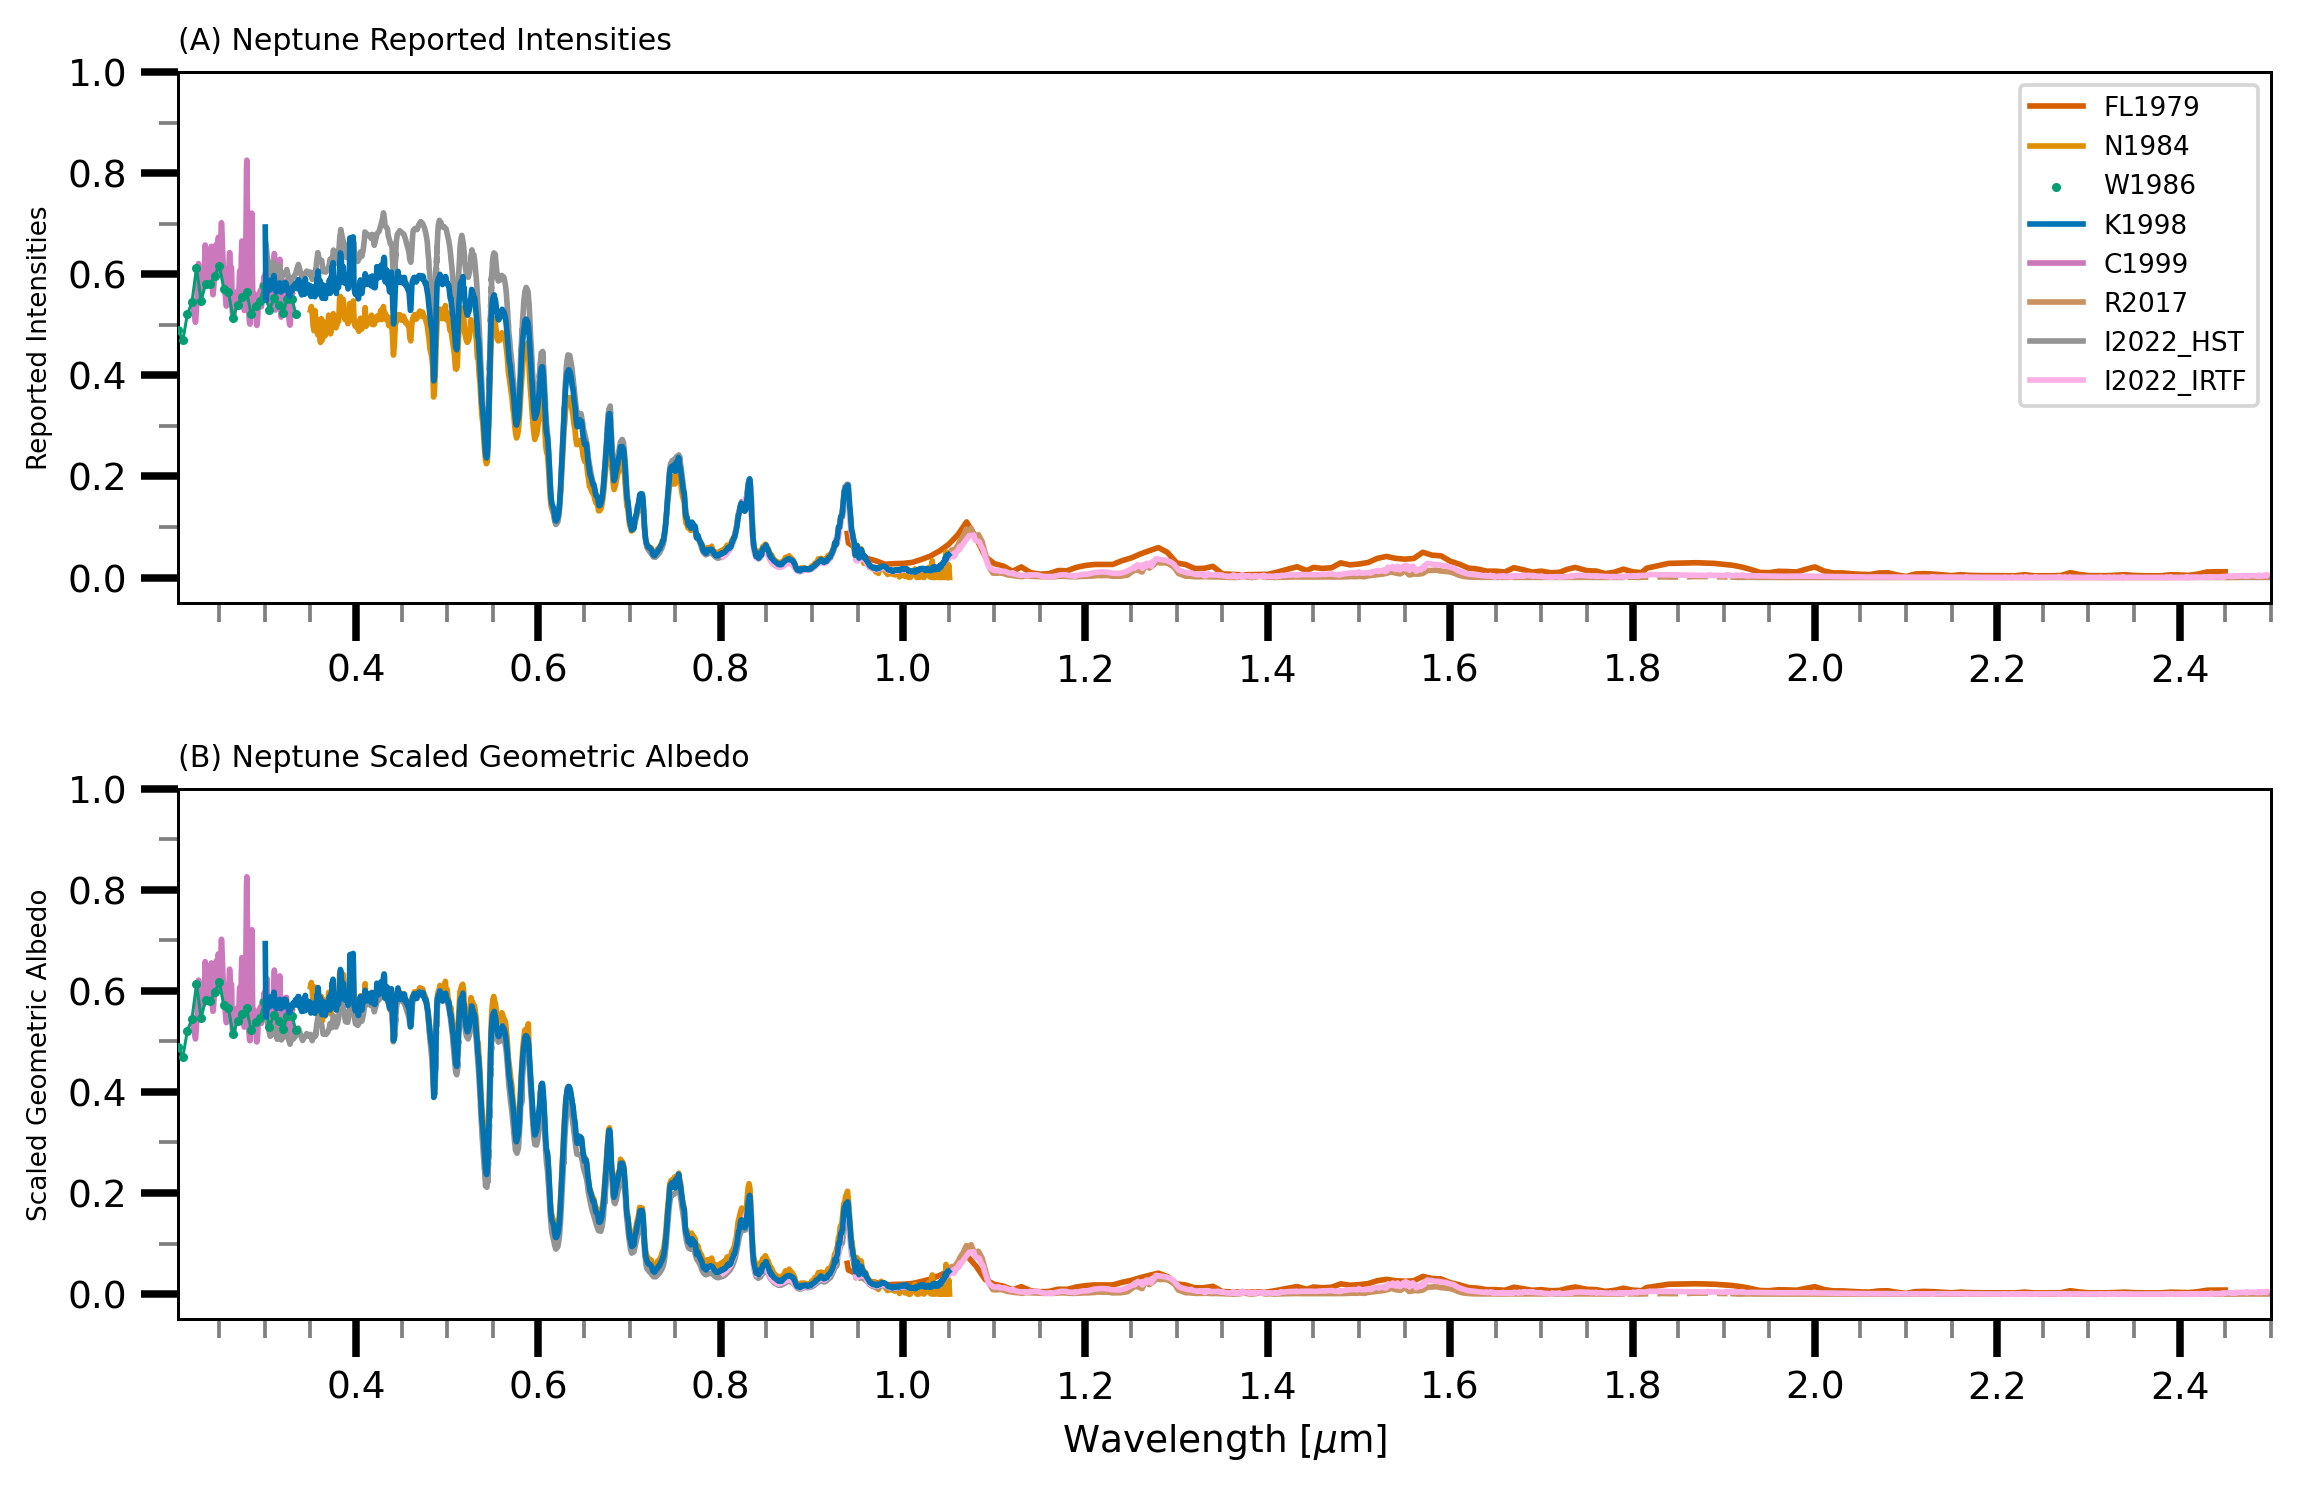

In [9]:
# Create figure and axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), dpi=270)
plt.subplots_adjust(hspace=0.35)

# DATA 
# FIGURE 1- ORIGINAL DATA
axes[0].plot(finklarson['x'],finklarson['y'], label='FL1979', color=cb_palette[3])
axes[0].plot(neff['wavelength']/10000, neff['p_neptune']/1000, label='N1984', color=cb_palette[1])
axes[0].scatter(wagener[:,0]/10000, wagener[:,1], label='W1986', color=cb_palette[2], zorder=3, s=2)
axes[0].plot(wagener[:,0]/10000, wagener[:,1], color=cb_palette[2], zorder=3, linewidth=0.8)
axes[0].plot(kark_98[:,0]/1000,kark_98[:,6], label='K1998', color=cb_palette[0],zorder=3)
axes[0].plot(courtin['x'],courtin['y'], label='C1999', color=cb_palette[4])
#axes[0].plot(roberge[roberge['Wavelength [$\\mu$m]']>1.04]['Wavelength [$\\mu$m]'], roberge[roberge['Wavelength [$\\mu$m]']>1.04]['Neptune'], label='R2017', color=cb_palette[9])
axes[0].plot(roberge[(roberge['Wavelength [$\\mu$m]']>=1.04) & (roberge['Wavelength [$\\mu$m]']<=1.79)]['Wavelength [$\\mu$m]'], roberge[(roberge['Wavelength [$\\mu$m]']>=1.04) & (roberge['Wavelength [$\\mu$m]']<=1.79)]['Uranus'], color=cb_palette[5], label='R2017')
axes[0].plot(roberge[(roberge['Wavelength [$\\mu$m]']>1.79) & (roberge['Wavelength [$\\mu$m]']<1.91)]['Wavelength [$\\mu$m]'], roberge[(roberge['Wavelength [$\\mu$m]']>1.79) & (roberge['Wavelength [$\\mu$m]']<1.91)]['Uranus'], color=cb_palette[5],linestyle='--')
axes[0].plot(roberge[(roberge['Wavelength [$\\mu$m]']>=1.91)]['Wavelength [$\\mu$m]'], roberge[roberge['Wavelength [$\\mu$m]']>=1.91]['Uranus'], color=cb_palette[5])
axes[0].plot(irwin_hst['x'], irwin_hst['y'], label='I2022_HST', color=cb_palette[7])
axes[0].plot(irwin_irtf['x'], irwin_irtf['y'], label='I2022_IRTF', color=cb_palette[6])

# # FIGURE 2- GEOMETRIC SCALING FACTORS APPLIED
axes[1].plot(finklarson['x'],finklarson['y']*0.7, label='FL1979', color=cb_palette[3])
axes[1].plot(neff['wavelength']/10000, neff['p_neptune']/1000*1.15, label='N1984', color=cb_palette[1])
axes[1].scatter(wagener[:,0]/10000, wagener[:,1], label='W1986', color=cb_palette[2], zorder=3, s=2)
axes[1].plot(wagener[:,0]/10000, wagener[:,1], color=cb_palette[2], zorder=3, linewidth=0.8)
axes[1].plot(kark_98[:,0]/1000,kark_98[:,6], label='K1998', color=cb_palette[0],zorder=3)
axes[1].plot(courtin['x'],courtin['y'], label='C1999', color=cb_palette[4])
#axes[0].plot(roberge[roberge['Wavelength [$\\mu$m]']>1.04]['Wavelength [$\\mu$m]'], roberge[roberge['Wavelength [$\\mu$m]']>1.04]['Neptune'], label='R2017', color=cb_palette[9])
axes[1].plot(roberge[(roberge['Wavelength [$\\mu$m]']>=1.04) & (roberge['Wavelength [$\\mu$m]']<=1.79)]['Wavelength [$\\mu$m]'], roberge[(roberge['Wavelength [$\\mu$m]']>=1.04) & (roberge['Wavelength [$\\mu$m]']<=1.79)]['Uranus'], color=cb_palette[5], label='R2017')
axes[1].plot(roberge[(roberge['Wavelength [$\\mu$m]']>1.79) & (roberge['Wavelength [$\\mu$m]']<1.91)]['Wavelength [$\\mu$m]'], roberge[(roberge['Wavelength [$\\mu$m]']>1.79) & (roberge['Wavelength [$\\mu$m]']<1.91)]['Uranus'], color=cb_palette[5],linestyle='--')
axes[1].plot(roberge[(roberge['Wavelength [$\\mu$m]']>=1.91)]['Wavelength [$\\mu$m]'], roberge[roberge['Wavelength [$\\mu$m]']>=1.91]['Uranus'], color=cb_palette[5])
axes[1].plot(irwin_hst['x'], irwin_hst['y']*0.85, label='I2022_HST', color=cb_palette[7])
axes[1].plot(irwin_irtf['x'], irwin_irtf['y'], label='I2022_IRTF', color=cb_palette[6])
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~FORMAT~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for value in range(2):
    # Keeping the tick marks consistent across the plots
    axes[value].xaxis.set_major_locator(MultipleLocator(0.2))
    axes[value].xaxis.set_minor_locator(MultipleLocator(0.05))
    axes[value].yaxis.set_major_locator(MultipleLocator(0.2))
    axes[value].yaxis.set_minor_locator(MultipleLocator(0.1))
    # Customize the appearance of ticks
    axes[value].tick_params(axis='both', which='major', length=10, width=2, color='black')
    axes[value].tick_params(axis='both', which='minor', length=5, width=1, color='gray')
    #axes[value].set_xlim(0.2,max(meadows['x']))
    axes[value].set_ylim(-0.05,1)
    axes[value].set_xlim(min(wagener[:,0]/10000),2.5)
    
axes[0].set_title('(A) Neptune Reported Intensities', fontsize=8, loc='left')
#axes[1].set_title('(B) Neptune Geometric Scale Factors Applied', fontsize=8, loc='left')
axes[1].set_title('(B) Neptune Scaled Geometric Albedo', fontsize=8, loc='left')
axes[0].set_ylabel('Reported Intensities', fontsize=7)
axes[1].set_ylabel('Intensities Scaled to Phase Zero Degrees', fontsize=7)
axes[1].set_ylabel('Scaled Geometric Albedo', fontsize=7)
axes[1].set_xlabel('Wavelength [$\mu$m]')
axes[0].legend(fontsize=7, loc='upper right') #, fancybox=True, shadow=True); #bbox_to_anchor=(0.7, 0.7),

plt.savefig('final_plots/neptune_doubleplot.png', bbox_inches='tight');

## The Final Composite Spectrum
- shown for reference

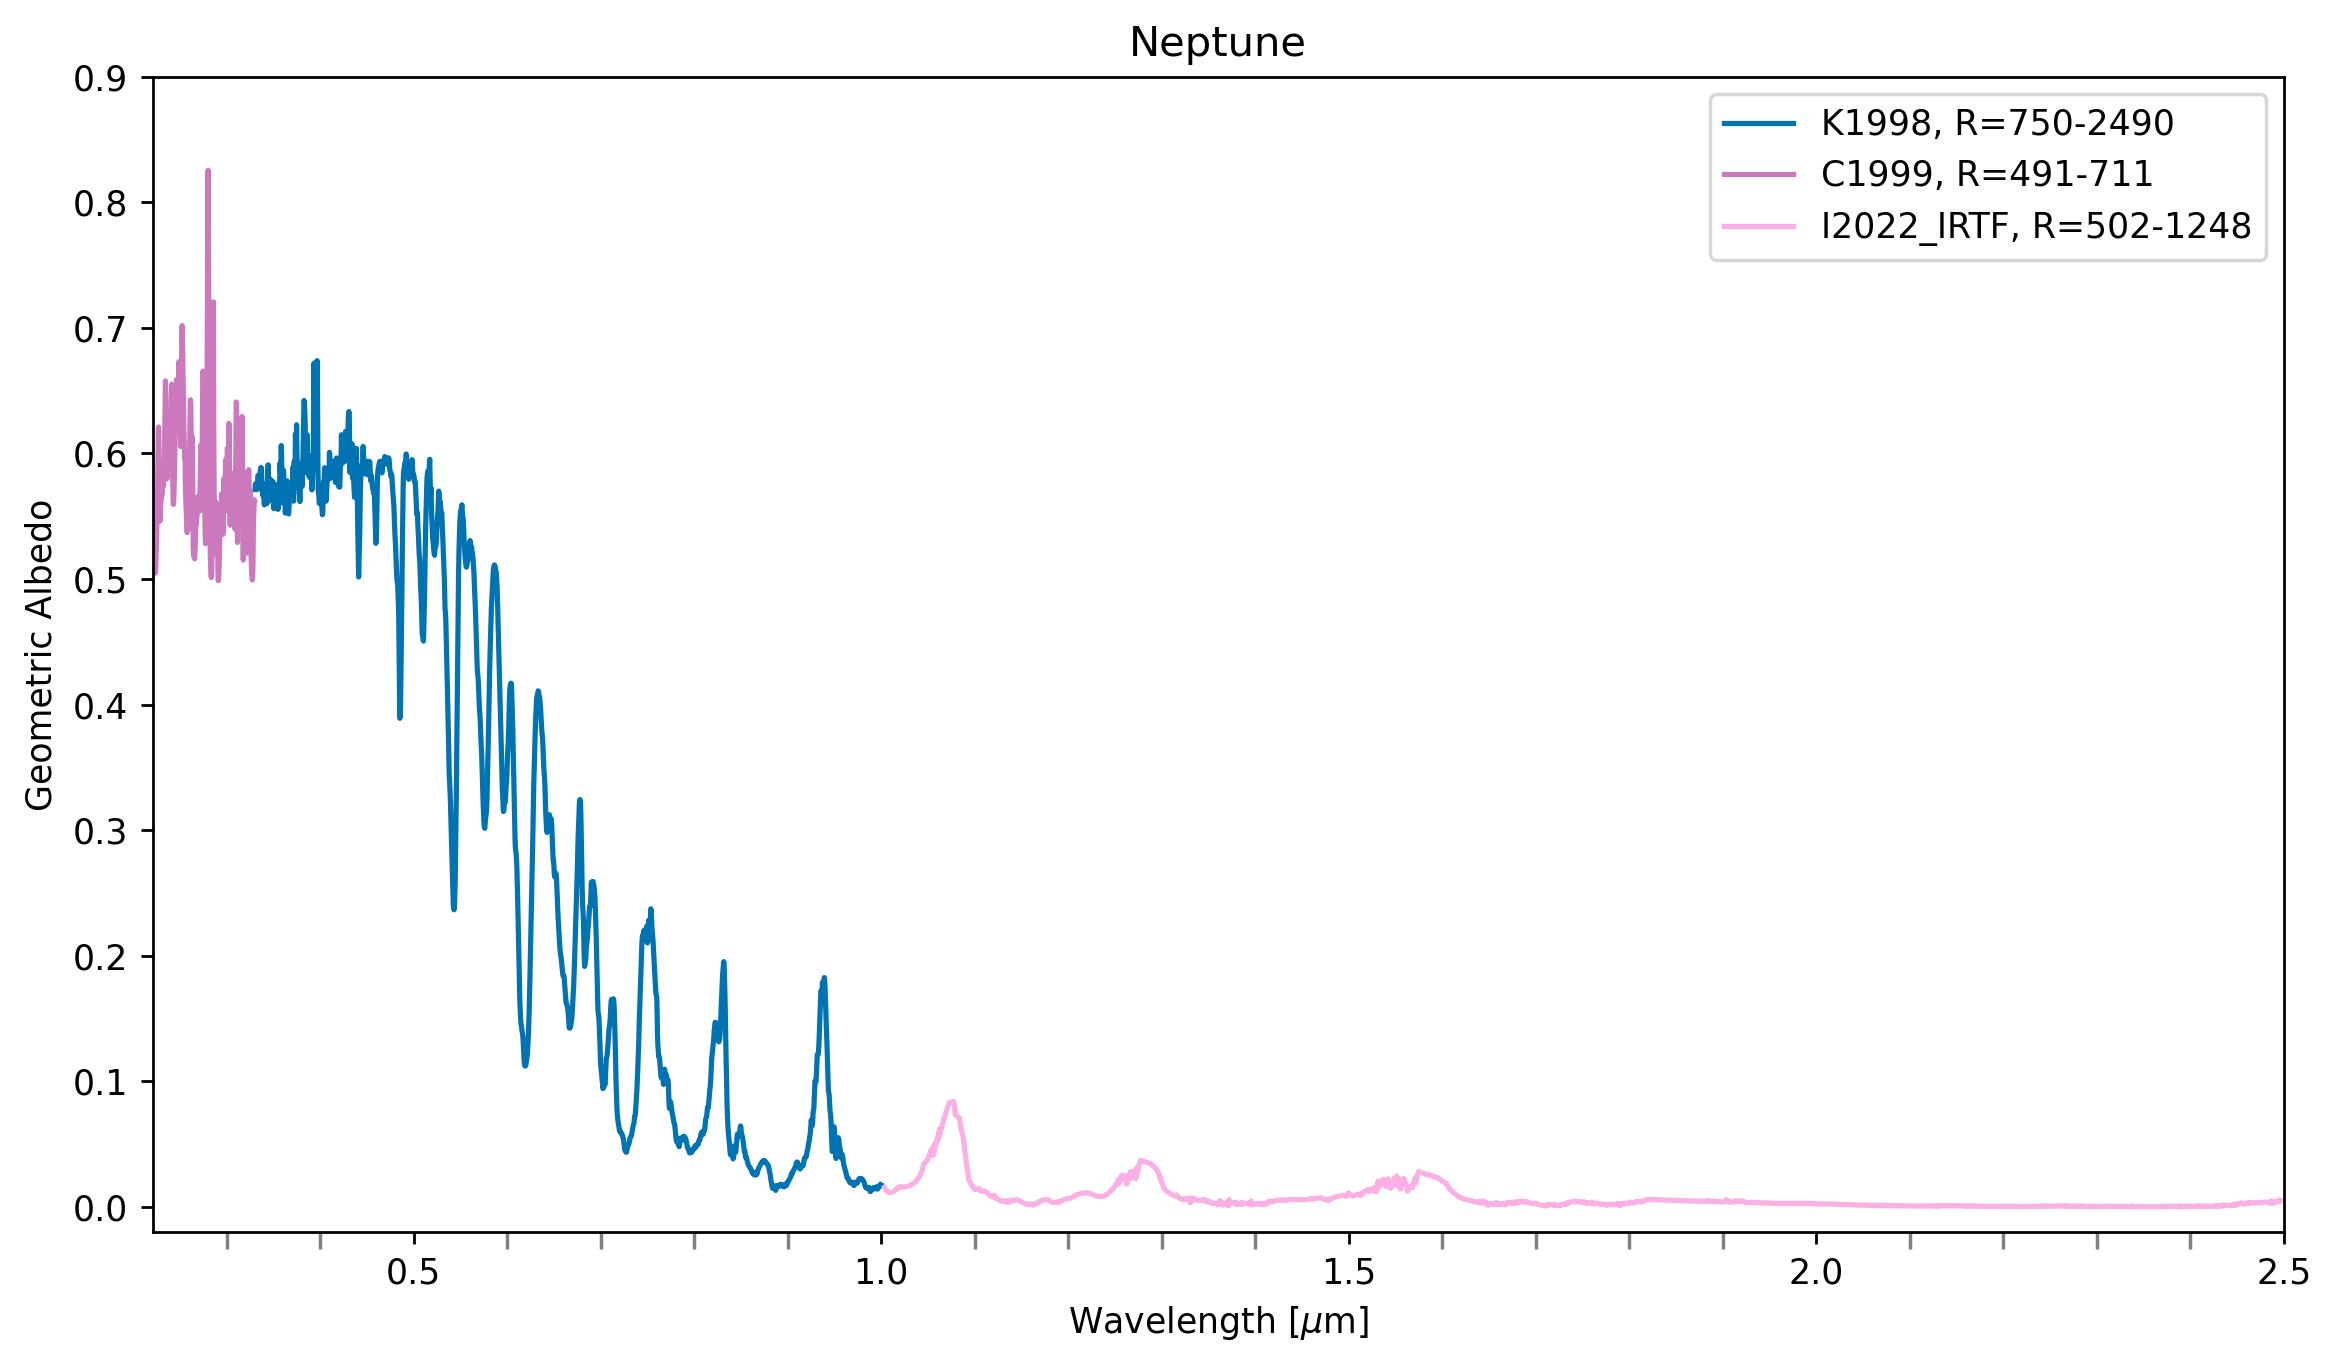

In [6]:
plt.figure(figsize=(11,6), dpi=250)

plt.plot(kark_98[(kark_98[:,0]/1000>0.33) & (kark_98[:,0]/1000<1)][:,0]/1000,kark_98[(kark_98[:,0]/1000>0.33) & (kark_98[:,0]/1000<1)][:,6], label='K1998, R=750-2490', color=cb_palette[0])
plt.plot(courtin['x'],courtin['y'], label='C1999, R=491-711', color=cb_palette[4])
plt.plot(irwin_irtf[irwin_irtf['x']>1]['x'], irwin_irtf[irwin_irtf['x']>1]['y'], label='I2022_IRTF, R=502-1248', color=cb_palette[6])

plt.gca().xaxis.set_minor_locator(MultipleLocator(0.1))
plt.gca().tick_params(axis='both', which='minor', length=5, width=1, color='gray')
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))
#plt.gca().yaxis.set_minor_locator(MultipleLocator(0.1))
    
plt.legend(fontsize=9)
plt.ylim(-0.02,0.9)
plt.xlim(min(courtin['x']),2.5)
plt.legend()
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Geometric Albedo')
plt.title('Neptune')

plt.savefig('final_plots/neptune_composite.png', bbox_inches="tight") ;

# Save Data

In [11]:
x_1= list(courtin['x'])
y_1= list(courtin['y'])
x_2= kark_98[(kark_98[:,0]/1000>0.33) & (kark_98[:,0]/1000<1)][:,0]/1000
y_2= kark_98[(kark_98[:,0]/1000>0.33) & (kark_98[:,0]/1000<1)][:,6]
x_3= irwin_irtf[irwin_irtf['x']>1]['x']
y_3= irwin_irtf[irwin_irtf['x']>1]['y']
x_new_list= np.concatenate((x_1, x_2, x_3))
y_new_list= np.concatenate((y_1, y_2, y_3))
composite_df= pd.DataFrame({'x_1': np.round(x_new_list,5), 'y_1': np.round(y_new_list,5)})

composite_df.to_csv('composite_spectrum/neptune_composite_data.csv', index=False)
composite_df.to_csv('composite_spectrum/neptune_composite_data.txt', sep=' ', index=False)